# Genesis Token Distribution

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import itertools
import re
import json

In [42]:
data = []

with open('data/data.json') as json_file:

    file = json.load(json_file)

    for line in file:
        output = {}

        output["name"] = line['name']
        output["Relay chain"] = line['relay_chain']
        output["Market supply"] = line['market_supply']
        output["Circulation supply"] = line['circulation_supply']
        output["Market cap"] = line['market_cap']

        for k in line["token_distribution"]:
            output[k[0]] = k[1]

        data.append(output)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,tokenomics,Auction&Liquidity,EcosystemDev,FoundationReserver,Backers,...,Incubator&Advisor,Treasure&Reserves,Protocol&Ecosystem,CrowdloanReserves,Ecosystem&DevCommunity,ProtocolReserve,StrategicPartners&Advisors,"Crowdlona,Fundraise",Treasury-NetworkDirected,CommunityDevelopment
0,Dora Factory,Kusama,10000000,3596477,11745468,0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,571172222,56226155,current,34.0,5.0,10.76,11.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Shiden Network,Kusama,70000000,56308560,15689436,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Astar,Polkadot,7000000000,3792460772,147252076,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Bifrost Kusama,Kusama,80000000,16775000,1625621,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bifrost Polkadot,Polkadot,80000000,16775000,1625621,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Pichiu,Kusama,0,10500000105,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Equilibrium,Polkadot,25,1100000000917,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Genshiro,Kusama,1200000000,869050,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
subcategories_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap
0,Dora Factory,Kusama,10000000,3596477,11745468
1,Acala,Polkadot,1000000000,571172222,56226155
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168
3,Shiden Network,Kusama,70000000,56308560,15689436
4,Astar,Polkadot,7000000000,3792460772,147252076
5,Bifrost Kusama,Kusama,80000000,16775000,1625621
6,Bifrost Polkadot,Polkadot,80000000,16775000,1625621
7,Pichiu,Kusama,0,10500000105,0
8,Equilibrium,Polkadot,25,1100000000917,0
9,Genshiro,Kusama,1200000000,869050,0


# Filter out the categories in the new categories list

In [44]:
categories = pd.read_csv('data/categories.csv')

print(categories)

                  Scraped Label   Category   Subcategory
0                  EcosystemDev    Budgets     Ecosystem
1            FoundationReserver    Reserve       Reserve
2                       Backers  Investors  Second Round
3                  FoundingTeam   Founders      Founders
4                  EarlyBackers  Investors    Seed Round
..                          ...        ...           ...
257                     Council   Founders      Founders
258                    Giveaway    Budgets     Ecosystem
259           Treasure&Reserves    Reserve       Reserve
260             ProtocolReserve    Reserve       Reserve
261  StrategicPartners&Advisors  Investors  Second Round

[262 rows x 3 columns]


In [45]:
categories["Subcategory"].unique()

array(['Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round',
       'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity',
       'Developers'], dtype=object)

In [46]:
for Subcategory in categories["Subcategory"].unique():
  subcategories_df[Subcategory] = 0

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,10000000,3596477,11745468,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,571172222,56226155,0,0,0,0,0,0,0,0,0,0,0
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,0,0,0,0,0,0,0,0,0,0,0
3,Shiden Network,Kusama,70000000,56308560,15689436,0,0,0,0,0,0,0,0,0,0,0
4,Astar,Polkadot,7000000000,3792460772,147252076,0,0,0,0,0,0,0,0,0,0,0
5,Bifrost Kusama,Kusama,80000000,16775000,1625621,0,0,0,0,0,0,0,0,0,0,0
6,Bifrost Polkadot,Polkadot,80000000,16775000,1625621,0,0,0,0,0,0,0,0,0,0,0
7,Pichiu,Kusama,0,10500000105,0,0,0,0,0,0,0,0,0,0,0,0
8,Equilibrium,Polkadot,25,1100000000917,0,0,0,0,0,0,0,0,0,0,0,0
9,Genshiro,Kusama,1200000000,869050,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Populate the dataframe with the respective values
for index, row  in categories.iterrows():
  try:
    subcategories_df[row["Subcategory"]] += df[row["Scraped Label"]]
  except:
    continue


subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,10000000,3596477,11745468,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,571172222,56226155,5.0,10.76,11.66,20.25,18.33,0.0,0.0,0.0,0.0,0.0,0.0
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,5.0,27.00,15.49,20.00,17.51,15.0,0.0,0.0,0.0,0.0,0.0
3,Shiden Network,Kusama,70000000,56308560,15689436,30.0,5.00,0.00,5.00,10.00,0.0,35.0,0.0,5.0,0.0,10.0
4,Astar,Polkadot,7000000000,3792460772,147252076,30.0,15.00,0.00,5.00,10.00,0.0,25.0,0.0,5.0,0.0,10.0
5,Bifrost Kusama,Kusama,80000000,16775000,1625621,32.0,10.00,0.00,20.00,15.00,20.0,0.0,0.0,3.0,0.0,0.0
6,Bifrost Polkadot,Polkadot,80000000,16775000,1625621,34.5,10.00,5.00,20.00,10.00,17.5,0.0,0.0,3.0,0.0,0.0
7,Pichiu,Kusama,0,10500000105,0,0.0,0.00,0.00,0.00,0.00,30.0,10.0,20.0,20.0,10.0,10.0
8,Equilibrium,Polkadot,25,1100000000917,0,0.0,35.00,0.00,15.00,5.00,10.0,0.0,25.0,0.0,10.0,0.0
9,Genshiro,Kusama,1200000000,869050,0,0.0,15.00,0.00,0.00,0.00,20.0,0.0,50.0,0.0,15.0,0.0


# Populating the special categories

In [48]:
# Auction&Liquidity
subcategories_df["Auctions"] += df["Auction&Liquidity"]/2
subcategories_df["Liquidity"] += df["Auction&Liquidity"]/2

# ParachainandEcosystem
subcategories_df["Crowdloan"] += df["ParachainandEcosystem"]/2
subcategories_df["Ecosystem"] += df["ParachainandEcosystem"]/2

# Marketing,Ecosystem&Partnerships
subcategories_df["Marketing"] += df["Marketing,Ecosystem&Partnerships"]/2
subcategories_df["Ecosystem"] += df["Marketing,Ecosystem&Partnerships"]/2

# Development&Marketing
subcategories_df["Developers"] += df["Development&Marketing"]/2
subcategories_df["Marketing"] += df["Development&Marketing"]/2

# MarketingAndEcosystem
subcategories_df["Marketing"] += df["MarketingAndEcosystem"]/2
subcategories_df["Ecosystem"] += df["MarketingAndEcosystem"]/2

# EcosystemandCommunity
subcategories_df["Ecosystem"] += df["EcosystemandCommunity"]/2
subcategories_df["Community"] += df["MarketingAndEcosystem"]/2

# Incubator&Advisor
subcategories_df["Seed Round"] += df["Incubator&Advisor"]/2
subcategories_df["Founders"] += df["Incubator&Advisor"]/2

# Ecosystem&DevCommunity
subcategories_df["Ecosystem"] += df["Ecosystem&DevCommunity"]/2
subcategories_df["Community"] += df["Ecosystem&DevCommunity"]/2


subcategories_df.head(10)
subcategories_df.to_csv('data/export_subcategories.csv')

# Data Analysis

In [49]:
categorized_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

for cat in categories["Category"].unique():
  categorized_df[cat] = 0

categorized_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,10000000,3596477,11745468,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,571172222,56226155,0,0,0,0,0,0
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,0,0,0,0,0,0
3,Shiden Network,Kusama,70000000,56308560,15689436,0,0,0,0,0,0
4,Astar,Polkadot,7000000000,3792460772,147252076,0,0,0,0,0,0
5,Bifrost Kusama,Kusama,80000000,16775000,1625621,0,0,0,0,0,0
6,Bifrost Polkadot,Polkadot,80000000,16775000,1625621,0,0,0,0,0,0
7,Pichiu,Kusama,0,10500000105,0,0,0,0,0,0,0
8,Equilibrium,Polkadot,25,1100000000917,0,0,0,0,0,0,0
9,Genshiro,Kusama,1200000000,869050,0,0,0,0,0,0,0


In [50]:
categories[ categories["Category"] == "Budgets"]["Subcategory"].unique()

array(['Ecosystem', 'Community', 'Marketing', 'Developers'], dtype=object)

In [51]:
categories

,Scraped Label,Category,Subcategory
0,EcosystemDev,Budgets,Ecosystem
1,FoundationReserver,Reserve,Reserve
2,Backers,Investors,Second Round
3,FoundingTeam,Founders,Founders
4,EarlyBackers,Investors,Seed Round
...,...,...,...
257,Council,Founders,Founders
258,Giveaway,Budgets,Ecosystem
259,Treasure&Reserves,Reserve,Reserve
260,ProtocolReserve,Reserve,Reserve


In [52]:
for cat in categories["Category"].unique():
  for subcat in categories[ categories["Category"] == cat]["Subcategory"].unique():
    categorized_df[cat] += subcategories_df[subcat]

categorized_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,10000000,3596477,11745468,0.0,0.00,0.00,0.00,0.0,0.0
1,Acala,Polkadot,1000000000,571172222,56226155,5.0,10.76,29.99,20.25,17.0,17.0
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,5.0,27.00,33.00,20.00,15.0,0.0
3,Shiden Network,Kusama,70000000,56308560,15689436,45.0,5.00,10.00,5.00,35.0,0.0
4,Astar,Polkadot,7000000000,3792460772,147252076,45.0,15.00,10.00,5.00,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
157,Hazel,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
158,Cdot,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
159,Wiv,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
160,Polimec,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0


# Scores

In [53]:
cat_mean = {}
cat_mean_total = 0
subcat_mean = {}
subcat_mean_total = 0

kusama_cat_mean = {}
kusama_cat_mean_total = 0
kusama_subcat_mean = {}
kusama_subcat_mean_total = 0

polkadot_cat_mean = {}
polkadot_cat_mean_total = 0
polkadot_subcat_mean = {}
polkadot_subcat_mean_total = 0

for cat in categories['Category'].unique():
  # Global
  cat_mean[cat] = categorized_df[cat].mean()
  cat_mean_total += cat_mean[cat]

  # Kusama
  kusama_cat_mean[cat] = categorized_df[categorized_df['Relay chain'] == 'Kusama'][cat].mean()
  kusama_cat_mean_total += kusama_cat_mean[cat]

  # Polkadot
  polkadot_cat_mean[cat] = categorized_df[categorized_df['Relay chain'] == 'Polkadot'][cat].mean()
  polkadot_cat_mean_total += polkadot_cat_mean[cat]

for subcat in categories['Subcategory'].unique():
  # Global
  subcat_mean[subcat] = subcategories_df[subcat].mean()
  subcat_mean_total += subcat_mean[subcat]

  # Kusama
  kusama_subcat_mean[subcat] = subcategories_df[subcategories_df['Relay chain'] == 'Kusama'][subcat].mean()
  kusama_subcat_mean_total += kusama_subcat_mean[subcat]

  # Polkadot
  polkadot_subcat_mean[subcat] = subcategories_df[subcategories_df['Relay chain'] == 'Polkadot'][subcat].mean()
  polkadot_subcat_mean_total += polkadot_subcat_mean[subcat]



In [54]:
print(polkadot_cat_mean)

for item in cat_mean:
  cat_mean[item] = (cat_mean[item]/cat_mean_total) * 100
  kusama_cat_mean[item] = (kusama_cat_mean[item]/kusama_cat_mean_total) * 100
  polkadot_cat_mean[item] = (polkadot_cat_mean[item]/polkadot_cat_mean_total) * 100



{'Budgets': 10.89663963963964, 'Reserve': 4.464504504504505, 'Investors': 6.391108108108108, 'Founders': 4.65990990990991, 'Parachain': 3.5720720720720722, 'Liquidity': 1.5495495495495495}


In [55]:
print(polkadot_subcat_mean)
print(kusama_subcat_mean)

for item in subcat_mean:
  subcat_mean[item] = (subcat_mean[item]/subcat_mean_total) * 100
  kusama_subcat_mean[item] = (kusama_subcat_mean[item]/kusama_subcat_mean_total) * 100
  polkadot_subcat_mean[item] = (polkadot_subcat_mean[item]/polkadot_subcat_mean_total) * 100

{'Ecosystem': 6.493274774774775, 'Reserve': 4.464504504504505, 'Second Round': 3.080927927927928, 'Founders': 4.65990990990991, 'Seed Round': 3.3101801801801796, 'Crowdloan': 2.018018018018018, 'Auctions': 1.554054054054054, 'Community': 2.1472972972972975, 'Marketing': 0.8209324324324325, 'Liquidity': 1.5495495495495495, 'Developers': 1.4351351351351351}
{'Ecosystem': 7.811224489795919, 'Reserve': 6.091836734693878, 'Second Round': 2.0406122448979596, 'Founders': 5.989795918367347, 'Seed Round': 3.1328571428571426, 'Crowdloan': 8.960204081632654, 'Auctions': 4.6020408163265305, 'Community': 9.285714285714286, 'Marketing': 1.7244897959183674, 'Liquidity': 5.8061224489795915, 'Developers': 2.163265306122449}


## Both relay chains

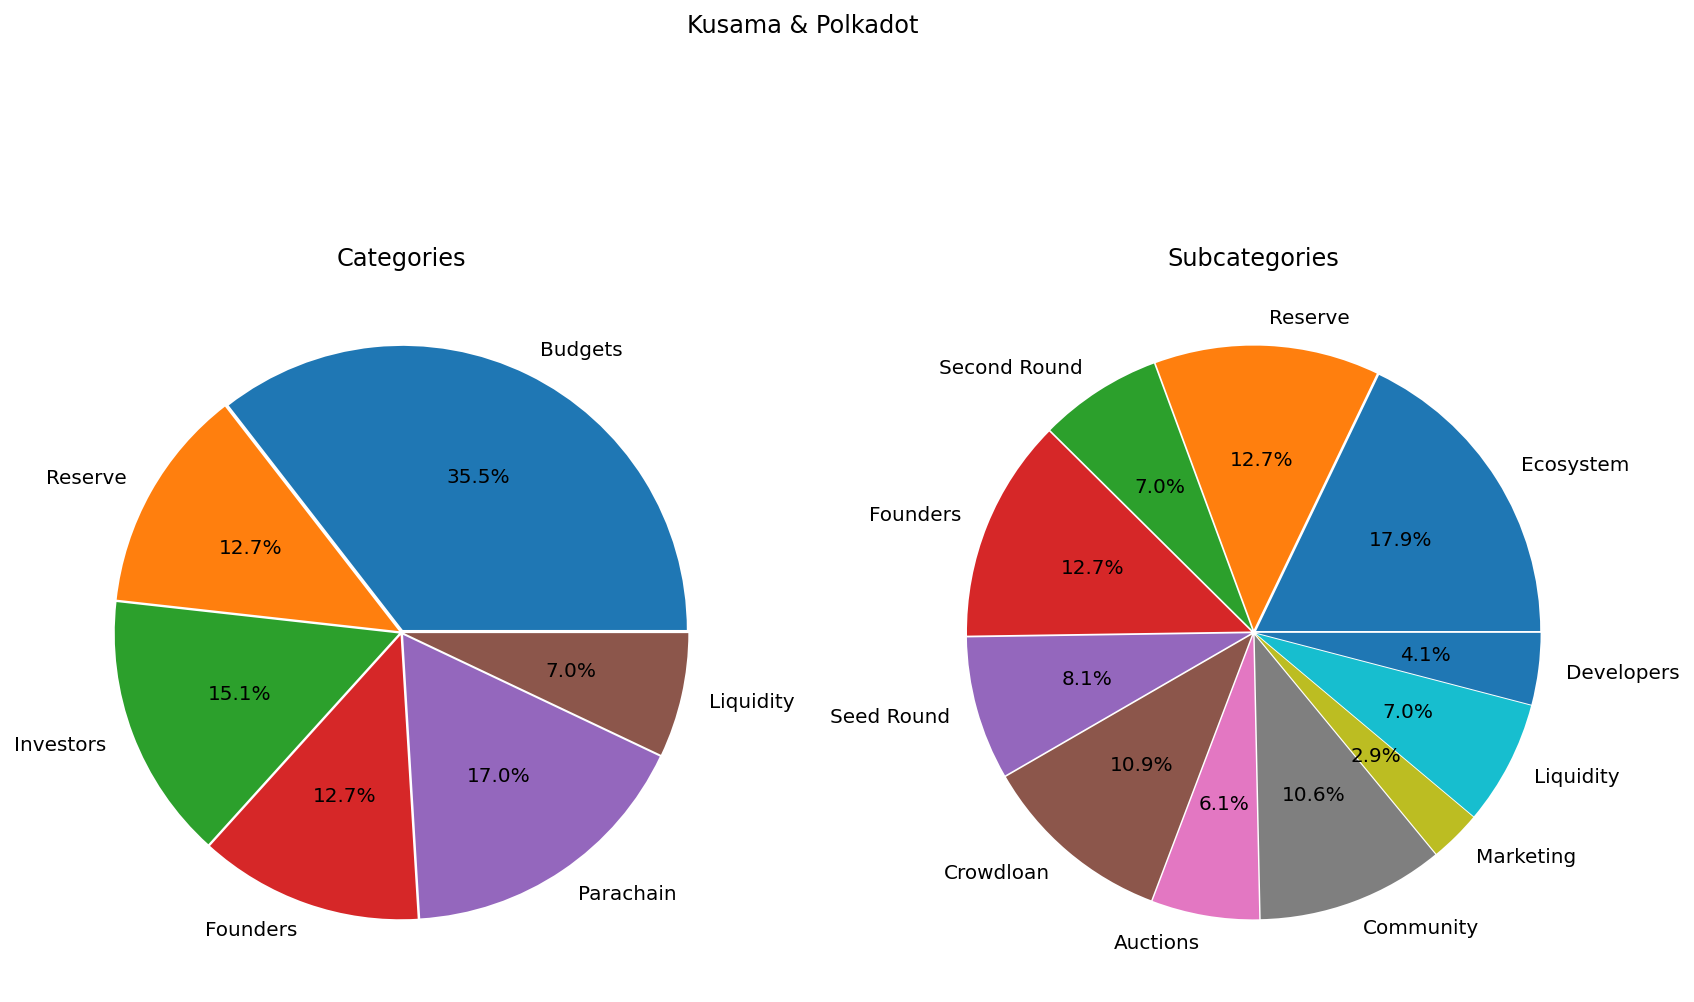

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14,9),dpi=144)
plt.suptitle("Kusama & Polkadot")

for ax, df, title in zip(axes, (cat_mean, subcat_mean), ('Categories', 'Subcategories')):
    labels = []
    sizes = []
    pop = []

    for x, y in df.items():
        labels.append(x)
        sizes.append(y)
        pop.append(.01)

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=pop, startangle=0)
    ax.set_title(title)

## Kusama

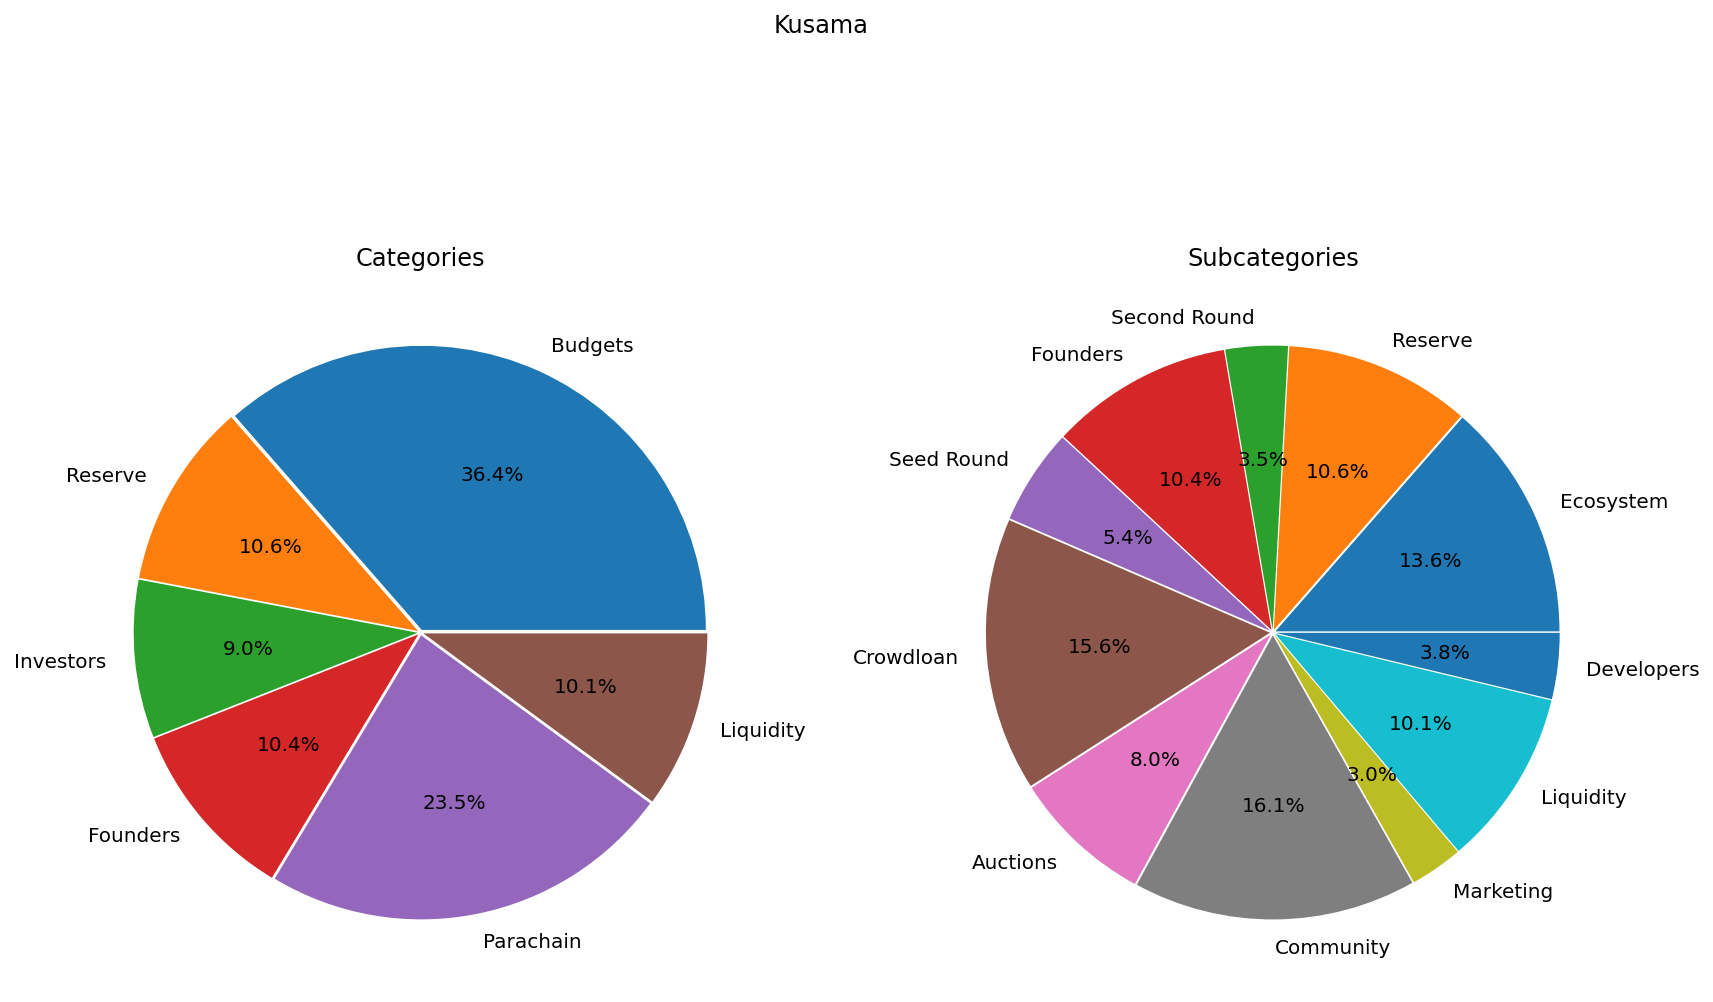

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14,9),dpi=144)
plt.suptitle("Kusama")

for ax, df, title in zip(axes, (kusama_cat_mean, kusama_subcat_mean), ('Categories', 'Subcategories')):
    labels = []
    sizes = []
    explode = []

    for x, y in df.items():
        labels.append(x)
        sizes.append(y)
        explode.append(.01)

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=0)
    ax.set_title(title)


## Polkadot

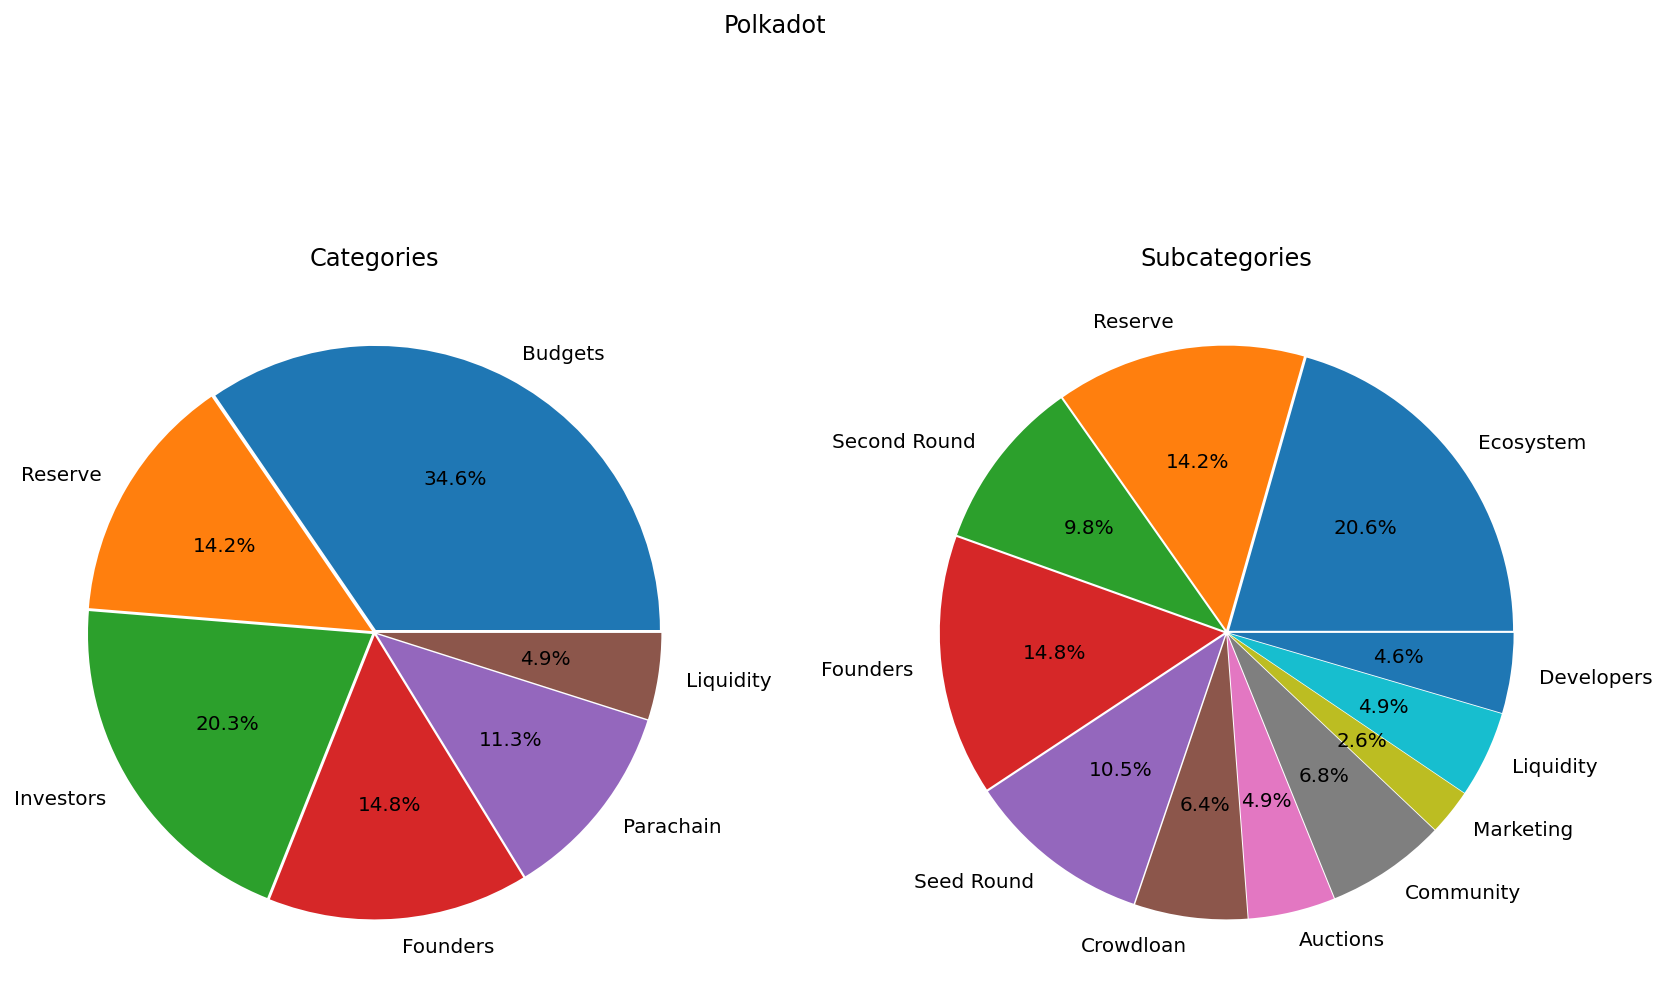

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14,9),dpi=144)
plt.suptitle("Polkadot")

for ax, df, title in zip(axes, (polkadot_cat_mean, polkadot_subcat_mean), ('Categories', 'Subcategories')):
    labels = []
    sizes = []
    pop = []

    for x, y in df.items():
        labels.append(x)
        sizes.append(y)
        pop.append(.01)

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=pop, startangle=0)
    ax.set_title(title)

# New plots

In [59]:
# polkadot_subcat_mean
cats = categories['Category'].unique()
subcats = []

data = []
data_kusama = []

hashmap = {}

for cat in categories['Category'].unique():
  for subcat in categories[categories['Category'] == cat]['Subcategory'].unique():
    hashmap[subcat] = cat
    subcats.append(subcat)

    data.append({
      'category': cat,
      'subcategory': subcat,
      'mean': polkadot_subcat_mean[subcat],
    })

    data_kusama.append({
      'category': cat,
      'subcategory': subcat,
      'mean': kusama_subcat_mean[subcat],
    })

data_df = pd.DataFrame.from_records(data)
data_df.sort_values(by=['category'], inplace=True)
data_df.head(20)



,category,subcategory,mean
0,Budgets,Ecosystem,20.591486
1,Budgets,Community,6.809514
2,Budgets,Marketing,2.603343
3,Budgets,Developers,4.551103
7,Founders,Founders,14.777516
5,Investors,Second Round,9.770245
6,Investors,Seed Round,10.497250
10,Liquidity,Liquidity,4.913935
8,Parachain,Crowdloan,6.399543
9,Parachain,Auctions,4.928219


In [60]:
data_kusama = pd.DataFrame.from_records(data_kusama)
data_kusama.sort_values(by=['category'], inplace=True)
data_kusama.head(20)


,category,subcategory,mean
0,Budgets,Ecosystem,13.559232
1,Budgets,Community,16.118747
2,Budgets,Marketing,2.993482
3,Budgets,Developers,3.755137
7,Founders,Founders,10.397478
5,Investors,Second Round,3.542228
6,Investors,Seed Round,5.438217
10,Liquidity,Liquidity,10.078645
8,Parachain,Crowdloan,15.553706
9,Parachain,Auctions,7.988522


['Budgets (34.6%)', 'Founders (14.8%)', 'Investors (20.3%)', 'Liquidity (4.9%)', 'Parachain (11.3%)', 'Reserve (14.2%)']


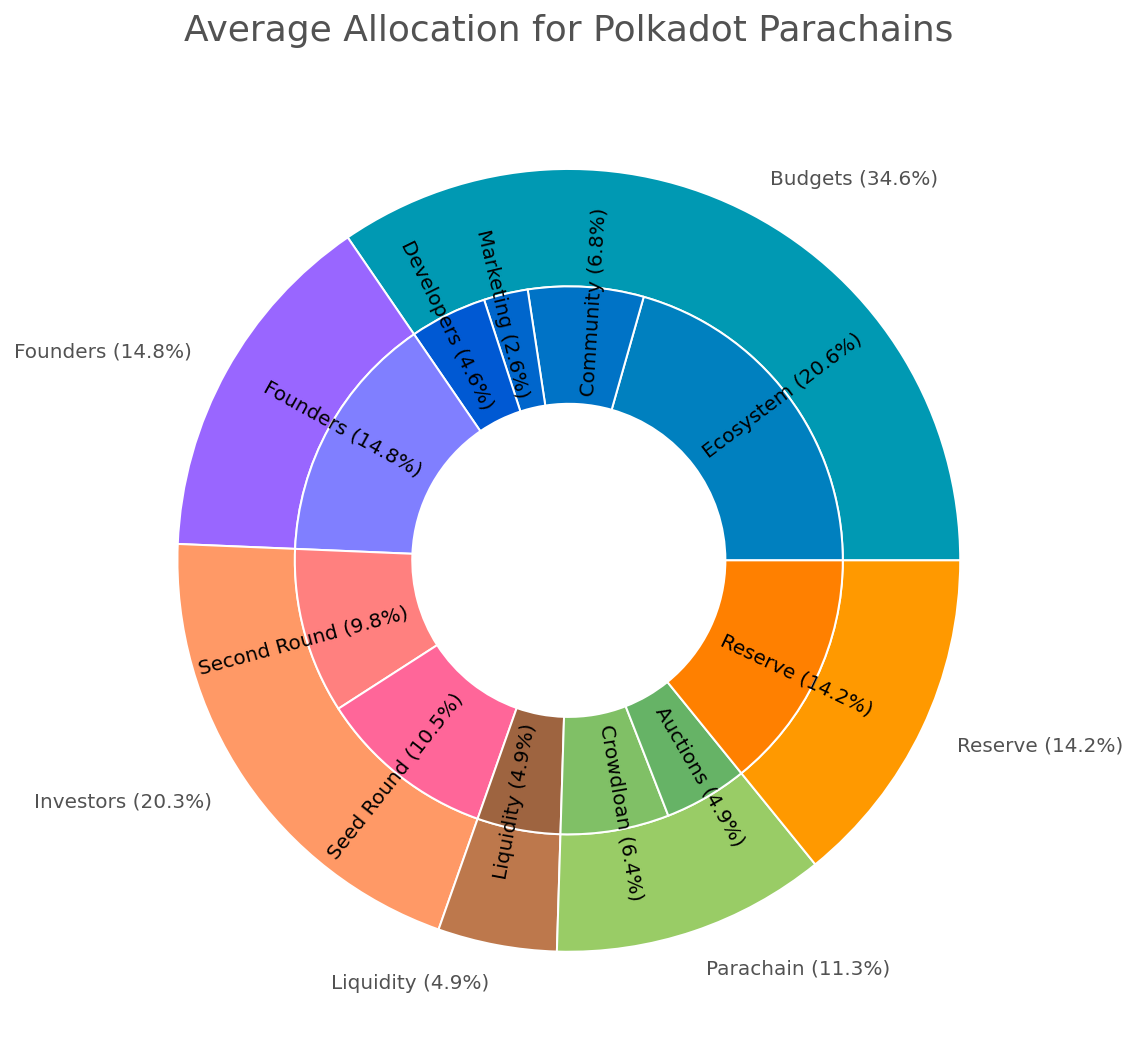

In [61]:
# plotting

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = data_df['category'].unique()
labels_with_percentage = []

for label in labels:
       labels_with_percentage.append(
                 '{} ({:.1f}%)'.format(label, data_df[data_df['category'] == label]['mean'].sum())
       )

print(labels_with_percentage)

sub_labels_with_percentage = []
sub_labels = data_df['subcategory'].unique()
for label in sub_labels:
       sub_labels_with_percentage.append(
                 '{} ({:.1f}%)'.format( label, data_df[data_df['subcategory'] == label]['mean'].mean())
       )


size = 0.3
vals = data_df['mean']
# Major category values = sum of minor category values
group_sum = data_df.groupby('category')['mean'].sum()

fig, ax = plt.subplots(figsize=(14,9),dpi=144)

a,b,c,d,e, f = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.summer, plt.cm.autumn]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6)]
inner_colors = [
       a(.5), a(0.45), a(.4), a(.35),
       b(.5),
       c(.5), c(0.4),
       d(.5),
       e(.5), e(.4),
       f(.5),
              ]


ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels_with_percentage, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       labels=sub_labels_with_percentage,
       rotatelabels=True,
       labeldistance=0.6,
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set_title('Average Allocation for Polkadot Parachains', 
       fontsize=18, pad=15, color=font_color, **hfont)

# plt.legend(loc=(1.1, .3))

filename = 'token-distribution-nested-pie'
plt.savefig(filename+'.png', facecolor=facecolor)

In [62]:
polkadot_subcat_mean['Ecosystem']

20.591486322405547

# Token valued in USDs

# By category

In [63]:
categorized_token_df = categorized_df
categorized_token_df["Total"] = 0
for cat in categories["Category"].unique():
  categorized_token_df[cat] *=  categorized_token_df["Market cap"].astype(int)/100
  categorized_token_df[cat] = categorized_token_df[cat].astype(int)
  categorized_token_df["Total"] = categorized_token_df[cat].astype(int)

categorized_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity,Total
0,Dora Factory,Kusama,10000000,3596477,11745468,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,571172222,56226155,2811307,6049934,16862223,11385796,9558446,9558446,9558446
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,253558,1369215,1673485,1014233,760675,0,0
3,Shiden Network,Kusama,70000000,56308560,15689436,7060246,784471,1568943,784471,5491302,0,0
4,Astar,Polkadot,7000000000,3792460772,147252076,66263434,22087811,14725207,7362603,36813019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Hazel,Polkadot,0,0,0,0,0,0,0,0,0,0
158,Cdot,Polkadot,0,0,0,0,0,0,0,0,0,0
159,Wiv,Polkadot,0,0,0,0,0,0,0,0,0,0
160,Polimec,Polkadot,0,0,0,0,0,0,0,0,0,0


# By subcategory

In [64]:
subcategories_token_df = subcategories_df
subcategories_token_df["Total"] = 0

for cat in categories["Subcategory"].unique():
  subcategories_token_df[cat] *=  subcategories_token_df["Market cap"].astype(int)/100
  subcategories_token_df[cat] = subcategories_token_df[cat].astype(int)
  subcategories_token_df["Total"] += subcategories_token_df[cat].astype(int)


subcategories_token_df.to_csv('subcategories_token_df_by_usd.csv', index = True)

subcategories_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers,Total
0,Dora Factory,Kusama,10000000,3596477,11745468,0,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,571172222,56226155,2811307,6049934,6555969,11385796,10306254,0,9558446,0,0,9558446,0,56226152
2,Bit.Country Pioneer,Kusama,100000000,20433142,5071168,253558,1369215,785523,1014233,887961,760675,0,0,0,0,0,5071165
3,Shiden Network,Kusama,70000000,56308560,15689436,4706830,784471,0,784471,1568943,0,5491302,0,784471,0,1568943,15689431
4,Astar,Polkadot,7000000000,3792460772,147252076,44175622,22087811,0,7362603,14725207,0,36813019,0,7362603,0,14725207,147252072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Hazel,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,Cdot,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
159,Wiv,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,Polimec,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# By Relay chain

In [65]:
subcategories_token_kusama_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Kusama"]
subcategories_token_polkadot_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Polkadot"]

categorized_token_kusama_df = categorized_token_df[categorized_token_df["Relay chain"] == "Kusama"]
categorized_token_polkadot_df = categorized_token_df[categorized_token_df["Relay chain"] == "Polkadot"]

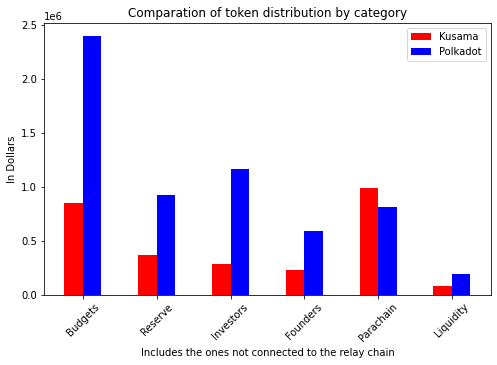

In [66]:


labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, categorized_token_kusama_df.loc[:,categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, categorized_token_polkadot_df.loc[:,categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

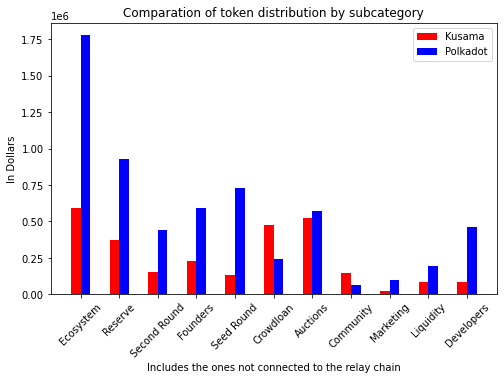

In [67]:
labels = categories["Subcategory"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, subcategories_token_kusama_df.loc[:, subcategories_token_kusama_df.columns!='Total' ].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, subcategories_token_polkadot_df.loc[:, subcategories_token_polkadot_df.columns!='Total' ].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by subcategory')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

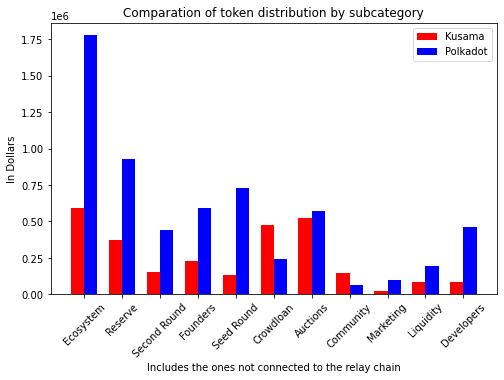

In [68]:
labels = categories["Subcategory"].unique()
width = 0.35
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, subcategories_token_kusama_df.loc[:, subcategories_token_kusama_df.columns!='Total' ].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, subcategories_token_polkadot_df.loc[:, subcategories_token_polkadot_df.columns!='Total' ].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by subcategory')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

In [69]:
conn_categorized_token_kusama_df = categorized_token_kusama_df[categorized_token_kusama_df["Total"] > 0]
conn_categorized_token_polkadot_df = categorized_token_polkadot_df[categorized_token_polkadot_df["Total"] > 0]

conn_subcategories_token_kusama_df = subcategories_token_kusama_df[subcategories_token_kusama_df["Total"] > 0]
conn_subcategories_token_polkadot_df = subcategories_token_polkadot_df[subcategories_token_polkadot_df["Total"] > 0]

## Excluding unconnected tokens

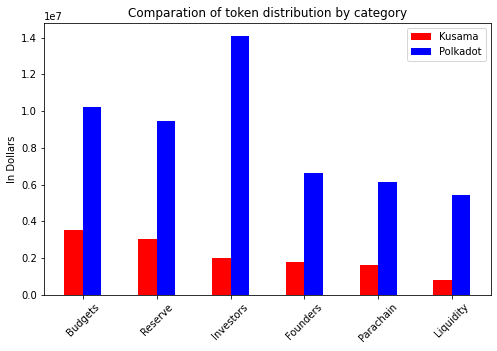

In [70]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()

# plt.annotate(f'Kusama: {int(conn_categorized_token_kusama_df["Investors"].mean())}\nPolkadot: {int(conn_categorized_token_polkadot_df["Investors"].mean())}', xy=(2,4), xycoords='data',
#             xytext=(10,200), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))


# plt.annotate(f'Kusama: {int(conn_categorized_token_kusama_df["Founders"].mean())}\nPolkadot: {int(conn_categorized_token_polkadot_df["Founders"].mean())}', xy=(3,4), xycoords='data',
#             xytext=(10,150), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))

plt.show()

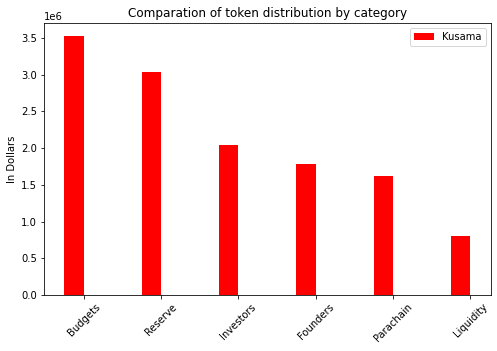

In [71]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()

# plt.annotate(f'Investors: {int(conn_categorized_token_kusama_df["Investors"].mean())}', xy=(2,4), xycoords='data',
#             xytext=(10,200), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))


# plt.annotate(f'Founders: {int(conn_categorized_token_kusama_df["Founders"].mean())}', xy=(3,4), xycoords='data',
#             xytext=(10,150), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))

plt.show()

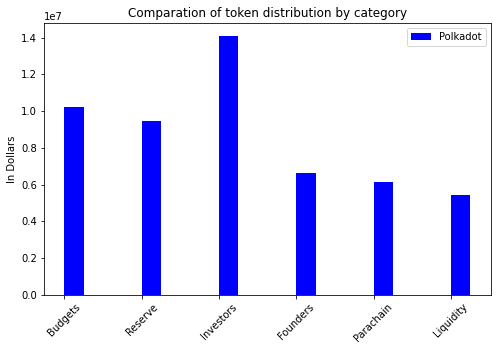

In [72]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals + width/2, conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()


plt.show()

## Pie chart

## For categories

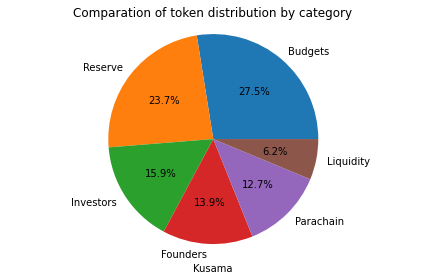

In [73]:
total_conn_categorized_token_kusama_df = conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].sum(numeric_only=True)


dic = total_conn_categorized_token_kusama_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Comparation of token distribution by category')
plt.xlabel(f'Kusama')
plt.tight_layout()


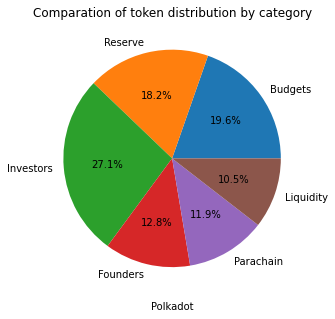

In [74]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.pie(conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].sum(numeric_only=True), labels = labels, autopct='%1.1f%%')
plt.title('Comparation of token distribution by category')

plt.xlabel(f'Polkadot')


plt.show()

## Subcategories

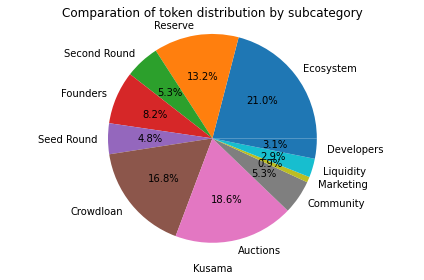

In [75]:
total_conn_subcategories_token_df = conn_subcategories_token_kusama_df.loc[:,conn_subcategories_token_kusama_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<11) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.xlabel(f'Kusama')
plt.tight_layout()

plt.show()

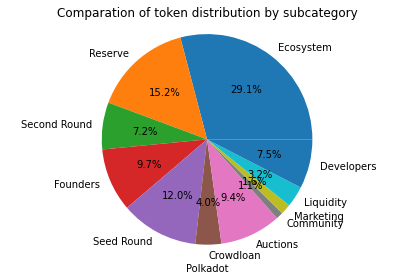

In [76]:
total_conn_subcategories_token_df = conn_subcategories_token_polkadot_df.loc[:,conn_subcategories_token_polkadot_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.xlabel(f'Polkadot')
plt.tight_layout()

plt.show()

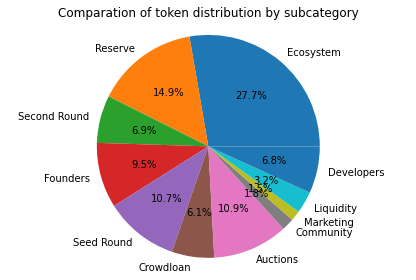

In [77]:
total_conn_subcategories_token_df = conn_subcategories_token_kusama_df.loc[:,conn_subcategories_token_kusama_df.columns!='Total'].sum(numeric_only=True)
total_conn_subcategories_token_df += conn_subcategories_token_polkadot_df.loc[:,conn_subcategories_token_polkadot_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.tight_layout()

plt.show()

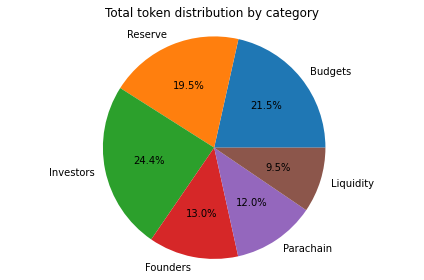

In [78]:
total_conn_categorized_token_df = conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].sum(numeric_only=True)
total_conn_categorized_token_df += conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].sum(numeric_only=True)


dic = total_conn_categorized_token_df.to_dict()
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title(f'Total token distribution by category')
plt.tight_layout()

plt.show()




# By Chain
    

In [79]:
df_by_name = subcategories_token_df[subcategories_token_df['name'] == 'Acala']

# total_conn_subcategories_token_by_name_df = df_by_name.sum(numeric_only=True)


# dic = total_conn_subcategories_token_by_name_df.to_dict()

# newdic={}
# for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<31962292898) else k):
#      newdic[key] = sum([dic[k] for k in list(group)])   

# labels = newdic.keys()
# sizes = newdic.values()

# fig, ax = plt.subplots()

# ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0,0,0,0,0,.1,0,0), startangle=0)
# ax.axis('equal')
# plt.title('Comparation of token distribution by subcategory')
# plt.tight_layout()

# plt.show()

In [80]:
# categorized_token_df

# labels = categories["Category"].unique()
# width = 0.25
# x_vals = np.arange(len(labels))

# plt.style.use('ggplot')

# for i, group in categorized_token_df.groupby("name"):
#     try:
#         plt.figure()
#         plt.pie(group.loc[:,group.columns!='Total'].sum(numeric_only=True), labels = labels, autopct='%1.1f%%')

#         plt.gca().set_aspect('equal', adjustable='box')
        
#         plt.title(f'{i}')
#         plt.show()
        
#     except:
#         continue